In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from wbfm.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from collections import defaultdict
import zarr

/home/charles/anaconda3/envs/wbfm/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading all projects

In [2]:
# fname = "/home/charles/dlc_stacks/worm1_for_students/project_config-workstation.yaml"
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/project_config.yaml"
project_data1 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile


File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/3-tracking/postprocessing/combined_3d_tracks---9.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
Annotations are already stable style
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/3-tracking/postprocessing/combined_3d_tracks---9.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/dat/2022-01-27_19-31_worm1_Ch0bigtiff.btf_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/dat/2022-01-27_19-31_worm1_Ch1bigtiff.btf_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/4-traces/red_traces.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annota

In [3]:
# Same project, but remote = most updated
# fname = "/home/charles/dlc_stacks/students-worm4-reanalysis/project_config-workstation.yaml"
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm4/project_config.yaml"
project_data2 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm4/3-tracking/postprocessing/combined_3d_tracks-3.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm4/3-tracking/postprocessing/combined_3d_tracks-3.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm4/dat/2022-01-27_21-26_worm4_Ch0bigtiff.btf_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm4/dat/2022-01-27_21-26_worm4_Ch1bigtiff.btf_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm4/4-traces/red_traces.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stac

In [4]:
# # Partial... still uint8
# fname = "/home/charles/dlc_stacks/round2-worm6-short-newseg/project_config-workstation.yaml"
# project_data3 = ProjectData.load_final_project_data_from_config(fname, to_load_frames=True)

In [5]:
# REMOTE
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/project_config.yaml"
project_data4 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/3-tracking/postprocessing/combined_3d_tracks-11.h5
ConfigFile  : INFO     Starting threads to read data...


ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/3-tracking/postprocessing/combined_3d_tracks-11.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/dat/2022-02-23_17-22_worm3_1_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/dat/2022-02-23_17-22_worm3_1_Ch1bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/4-traces/red_traces.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/4-traces/green_traces.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/1-segmentation/masks.zarr', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/4-traces/reindexed_masks.zarr.zip']
ConfigFile  : INFO     ====

In [6]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/project_config.yaml"
project_data_gfp1 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/3-tracking/postprocessing/combined_3d_tracks-4.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : WARNING  Did not find behavioral annotations
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/3-tracking/postprocessing/combined_3d_tracks-4.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/dat/2022-04-09_14-51_ZIM2319_worm5_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/dat/2022-04-09_14-51_ZIM2319_worm5_Ch1bigtiff_preprocessed.zarr.zip

In [7]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/project_config.yaml"
project_data_bright1 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile


File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/3-tracking/postprocessing/combined_3d_tracks-1.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
Annotations are already stable style
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/3-tracking/postprocessing/combined_3d_tracks-1.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/dat/2021-12-17_16-28-19_worm5-channel-0-pco_camera1bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/dat/2021-12-17_16-28-19_worm5-channel-1-pco_camera2bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stack

In [8]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm7/project_config.yaml"
project_data_bright2 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm7/3-tracking/postprocessing/combined_3d_tracks-1.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : WARNING  Did not find behavioral annotations
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm7/3-tracking/postprocessing/combined_3d_tracks-1.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm7/dat/2021-12-17_17-38-56_worm7-channel-0-pco_camera1bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_anno

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm7 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [9]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/project_config.yaml"
project_data1_C = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/3-tracking/postprocessing/combined_3d_tracks.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
Found no behavior subfolder in /scratch/neurobiology/zimmer/ulises/wbfm/20220614/data/ZIM2156_worm6, aborting
ConfigFile  : WARNING  behavior_fname search failed; returning empty object
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/3-tracking/postprocessing/combined_3d_tracks.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/dat/2022-06-14_14-04_ZIM2156_worm6_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/dat/2022-06-14_14-04

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [10]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright7-2022_06_30/project_config.yaml"

project_data2_C = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright7-2022_06_30/3-tracking/postprocessing/combined_3d_tracks.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
Found no behavior subfolder in /scratch/neurobiology/zimmer/ulises/wbfm/20220614/data/ZIM2156_worm7, aborting
ConfigFile  : WARNING  behavior_fname search failed; returning empty object
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright7-2022_06_30/3-tracking/postprocessing/combined_3d_tracks.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright7-2022_06_30/dat/2022-06-14_14-23_ZIM2156_worm7_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright7-2022_06_30/dat/2022-06-14_14-23

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright7-2022_06_30 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [11]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright8-2022_06_30/project_config.yaml"
project_data3_C = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright8-2022_06_30/3-tracking/postprocessing/combined_3d_tracks.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
Found no behavior subfolder in /scratch/neurobiology/zimmer/ulises/wbfm/20220614/data/ZIM2156_worm8, aborting
ConfigFile  : WARNING  behavior_fname search failed; returning empty object
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright8-2022_06_30/3-tracking/postprocessing/combined_3d_tracks.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright8-2022_06_30/dat/2022-06-14_14-41_ZIM2156_worm8_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright8-2022_06_30/dat/2022-06-14_14-41

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright8-2022_06_30 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [12]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright9-2022_06_30/project_config.yaml"
project_data4_C = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright9-2022_06_30/3-tracking/postprocessing/combined_3d_tracks.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
Found no behavior subfolder in /scratch/neurobiology/zimmer/ulises/wbfm/20220614/data/ZIM2156_worm9, aborting
ConfigFile  : WARNING  behavior_fname search failed; returning empty object
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright9-2022_06_30/3-tracking/postprocessing/combined_3d_tracks.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright9-2022_06_30/dat/2022-06-14_15-04_ZIM2156_worm9_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright9-2022_06_30/dat/2022-06-14_15-04

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright9-2022_06_30 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



# Convinience function

In [77]:

def calc_hist(df, t=1000):
    green_means = df.loc[:t, (slice(None), 'intensity_image')] / df.loc[:t, (slice(None), 'area')].values
    green_means -= np.min(green_means)  # Some of them have different background due to postprocessing
    
    green_mean_of_means = green_means.median(axis=0, skipna=True, numeric_only=True)
    
    return green_mean_of_means

# Type 1: original projects

## Calculate the histogram of raw green brightnesses for first 100 time points

In [78]:
all_projects = [project_data1, project_data2, project_data4]
# all_projects = [project_data1, project_data2, project_data4, project_data5, project_data6]


In [79]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Green brightness (background subtracted)')

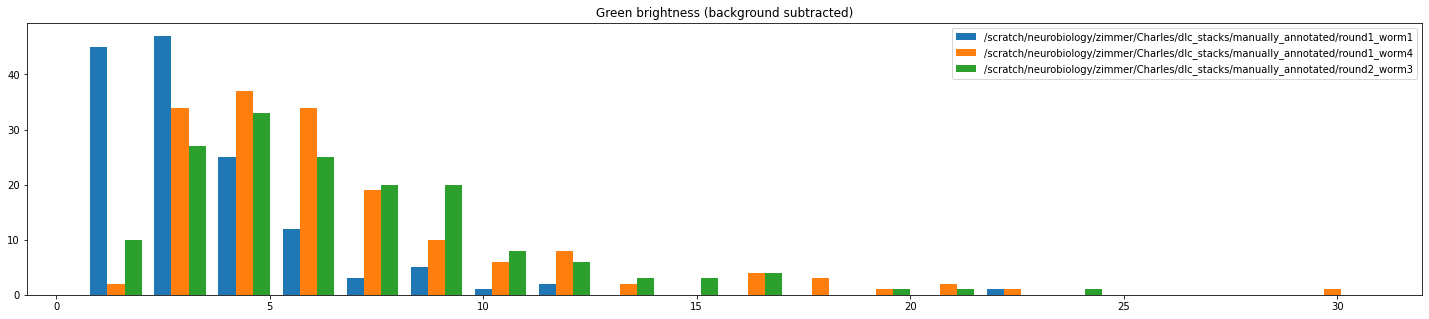

In [80]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

In [81]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Red brightness (background subtracted)')

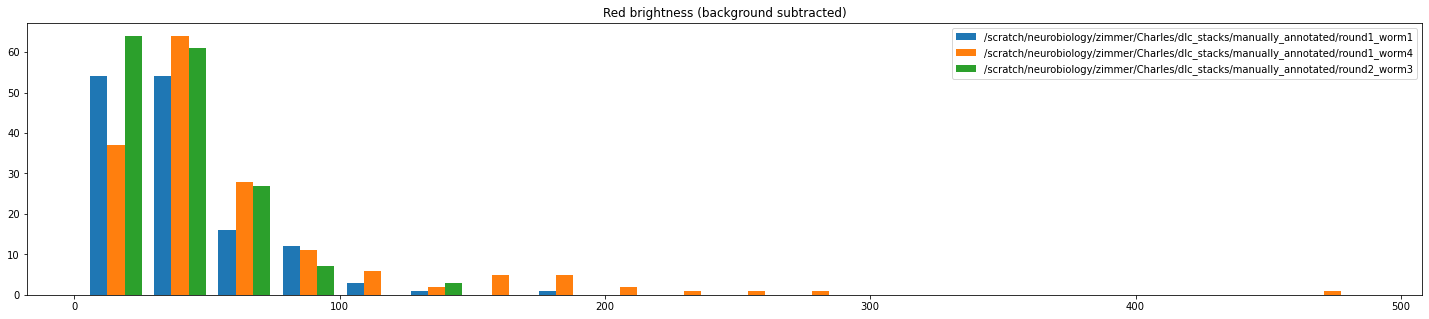

In [82]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

# Type 2: the old bright worms

In [83]:
all_projects = [project_data_bright1, project_data_bright2]


In [84]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Green brightness (background subtracted)')

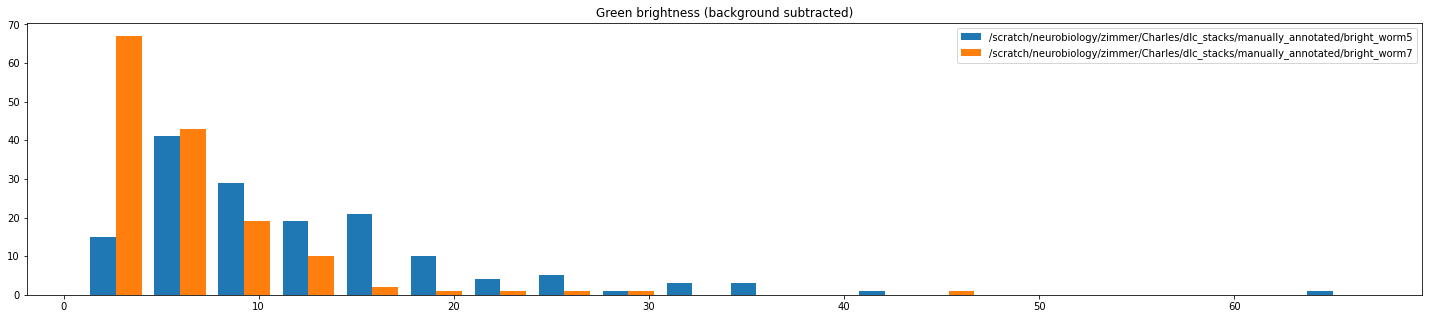

In [85]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

In [86]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Red brightness (background subtracted)')

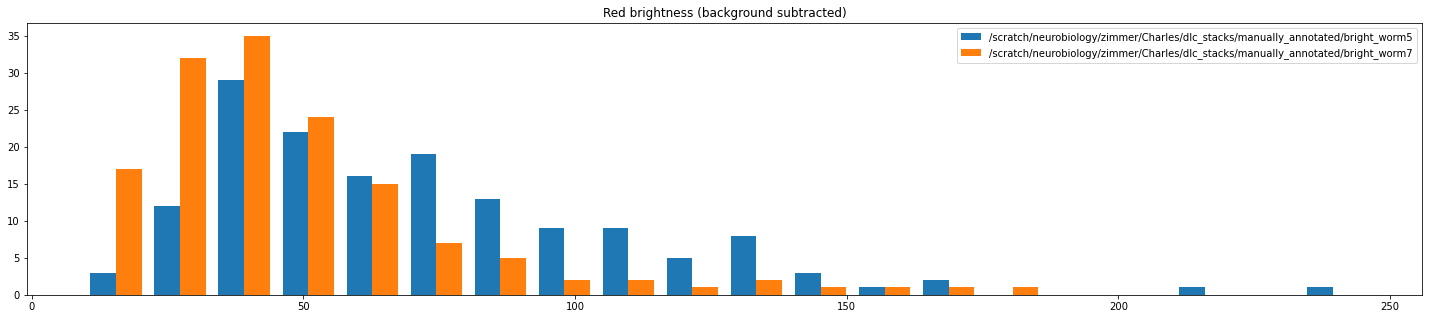

In [87]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

# Type 3: GFP

In [88]:
all_projects = [project_data_gfp1]


In [89]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Green brightness (background subtracted)')

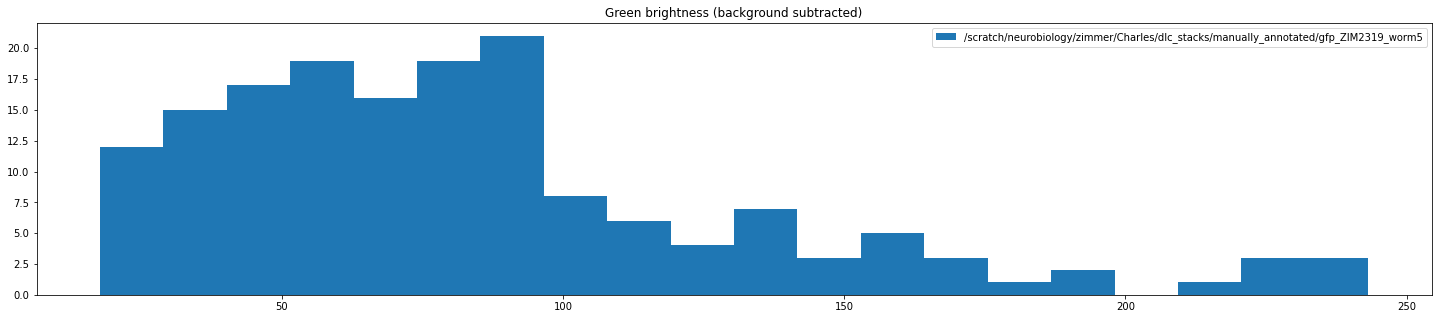

In [90]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

In [91]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Red brightness (background subtracted)')

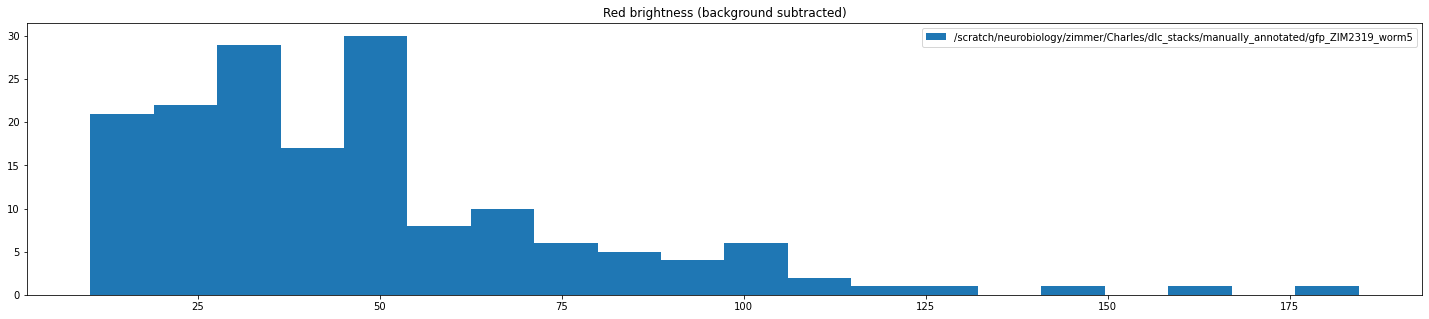

In [92]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

# Type 4: new bright worms

In [93]:
all_projects = [project_data1_C, project_data2_C, project_data3_C, project_data4_C]


In [94]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Green brightness (background subtracted)')

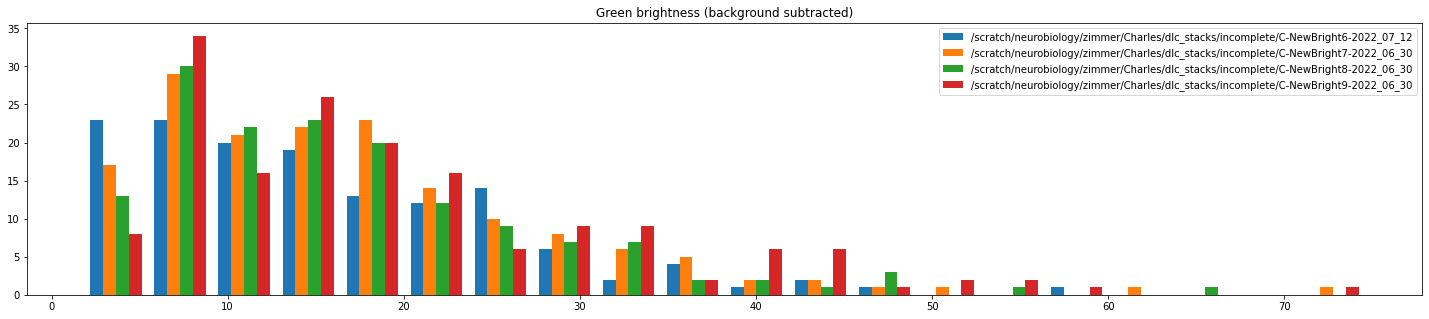

In [95]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

In [96]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Red brightness (background subtracted)')

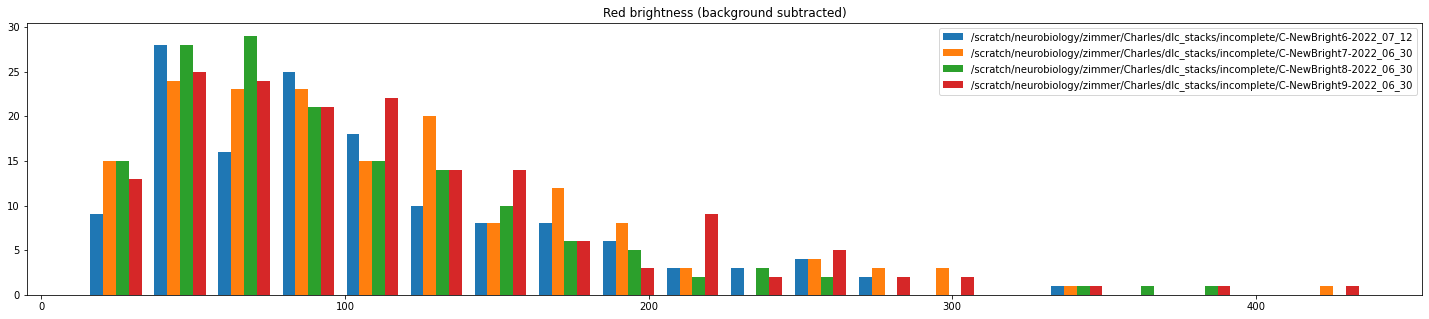

In [97]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

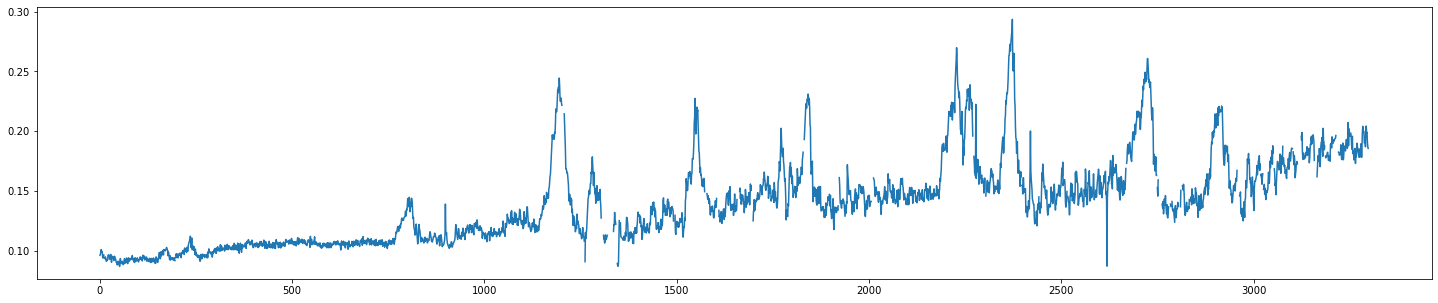

In [98]:
neuron = 'neuron_033'

back = project_data1.green_traces[neuron]['area'] * 100
y = (project_data1.green_traces[neuron]['intensity_image'] - back) / (project_data1.red_traces[neuron]['intensity_image'] - back)
plt.figure(figsize=(25,5))
plt.plot(y)